<a href="https://colab.research.google.com/github/capybabruh/FruitImageProcessing/blob/main/ProjectImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


#Data Preprocessing

##Training Image Preprocessing

In [ ]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)


Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing


In [ ]:
#Tạo dataset validation đánh giá hiệu suất mô hình dự đoán có overfitting hay không
validation_set = tf.keras.utils.image_dataset_from_directory(
"/content/drive/MyDrive/archive/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model


In [ ]:
#Khoi tao mo hinh CNN
cnn = tf.keras.models.Sequential()

Building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Building pooling layer

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))#To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [ ]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

#Compiling and Training Image Recognition model

In [ ]:
cnn.compile(optimizer ='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
"""loss='categorical_crossentropy': Chỉ định hàm mất mát được sử dụng là categorical cross-entropy
TensorFlow sẽ sử dụng categorical_crossentropy để tính toán giá trị mất mát
dựa trên đầu ra của mô hình và nhãn thực tế"""
"optimizer = 'rmsprop': Chỉ định thuật toán tối ưu hóa được sử dụng là RMSprop(Root Mean Square Propagation)"


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 558s 6s/step - accuracy: 0.0252 - loss: 16.0632 - val_accuracy: 0.0313 - val_loss: 3.5773
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.0303 - loss: 3.8125 - val_accuracy: 0.0399 - val_loss: 3.5200
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.0435 - loss: 3.5968 - val_accuracy: 0.0484 - val_loss: 3.5325
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0614 - loss: 3.5257 - val_accuracy: 0.0798 - val_loss: 3.9157
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.0947 - loss: 3.3609 - val_accuracy: 0.3077 - val_loss: 2.8368
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.1417 - loss: 3.1059 - val_accuracy: 0.4131 - val_loss: 2.3194
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.2173 - loss: 2.8457 - val_accuracy: 0.5271 - val_loss: 1.9530
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2581 - loss: 2.5676 - val_accuracy: 0.4644 - 

#Saving model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history # Tra ve lich su data da dc trained

{'accuracy': [0.02792937308549881,
  0.03274478390812874,
  0.04751203954219818,
  0.06324237585067749,
  0.1033707857131958,
  0.15826645493507385,
  0.21733547747135162,
  0.2664526402950287,
  0.33483144640922546,
  0.40321028232574463,
  0.46260032057762146,
  0.5322632193565369,
  0.5884430408477783,
  0.6443017721176147,
  0.6536115407943726,
  0.7078651785850525,
  0.7402889132499695,
  0.7701444625854492,
  0.7974317669868469,
  0.8041733503341675,
  0.8224719166755676,
  0.837239146232605,
  0.8606741428375244,
  0.8558587431907654,
  0.8712680339813232,
  0.866131603717804,
  0.8837881088256836,
  0.8847512006759644,
  0.8786516785621643,
  0.8905296921730042,
  0.9017656445503235,
  0.8966292142868042],
 'loss': [6.641514778137207,
  3.684705972671509,
  3.5996251106262207,
  3.4875173568725586,
  3.298027992248535,
  3.040351390838623,
  2.7919085025787354,
  2.531845808029175,
  2.290440797805786,
  2.04025936126709,
  1.8290761709213257,
  1.614139199256897,
  1.382583856

In [ ]:
#Recording history in JSON format
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#Caculating accuracy of model achieved on validation set

In [ ]:
print('Valuation accuracy :{}%' .format(training_history.history['val_accuracy'][-1]*100))

Valuation accuracy :96.29629850387573%


#Accuracy Visualization

Training visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

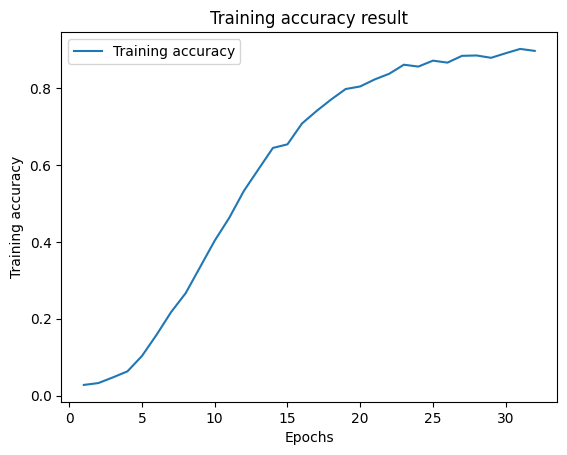

In [ ]:
#Hien thi do chinh xac cac lan training
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],label = 'Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy result')
plt.legend()
plt

#Validation

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

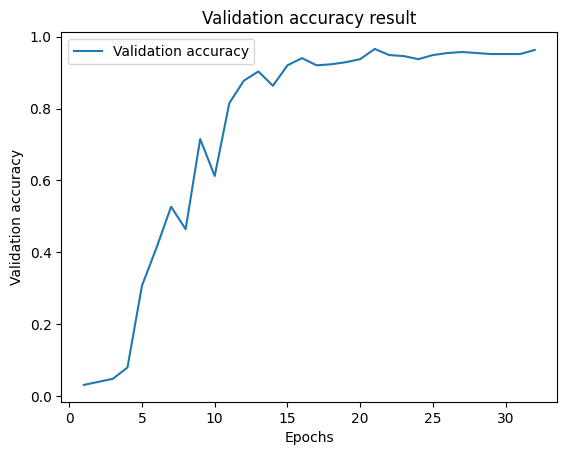

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy result')
plt.legend()
plt